In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.svm import SVR,SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [3]:
data=pd.read_csv('mushroom.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
data=data.drop('Unnamed: 0', axis=1)

In [5]:
data.duplicated().sum()

np.int64(1024)

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 976 non-null    object 
 1   cap_surface               976 non-null    object 
 2   cap_color                 976 non-null    object 
 3   bruises                   976 non-null    object 
 4   odor                      976 non-null    object 
 5   gill_attachment           976 non-null    object 
 6   gill_spacing              976 non-null    object 
 7   gill_size                 976 non-null    object 
 8   gill_color                976 non-null    object 
 9   stalk_shape               976 non-null    object 
 10  stalk_root                976 non-null    object 
 11  stalk_surface_above_ring  976 non-null    object 
 12  stalk_surface_below_ring  976 non-null    object 
 13  stalk_color_above_ring    976 non-null    object 
 14  stalk_color_be

In [9]:
for column in data.columns:
  if data[column].dtype == 'object':
    fig = px.histogram(data, x=column)
    fig.show()

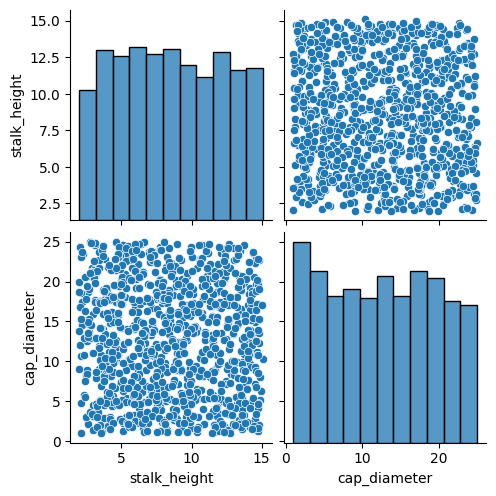

In [10]:
numerical = data.select_dtypes(include=['int64','float']).columns
sns.pairplot(data[numerical])
plt.show()

In [11]:
for column in data.columns:
  if data[column].dtype != 'object':
    fig = px.box(data, y=column)
    fig.show()

C:\Users\revan\AppData\Local\Temp\ipykernel_648\2703667869.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




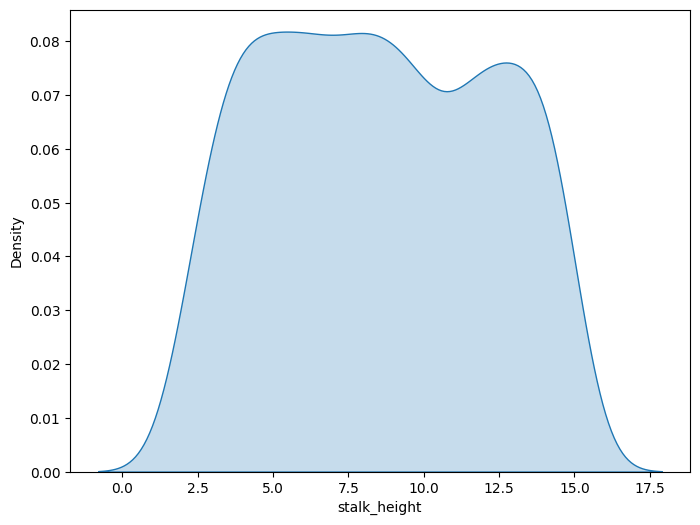

C:\Users\revan\AppData\Local\Temp\ipykernel_648\2703667869.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




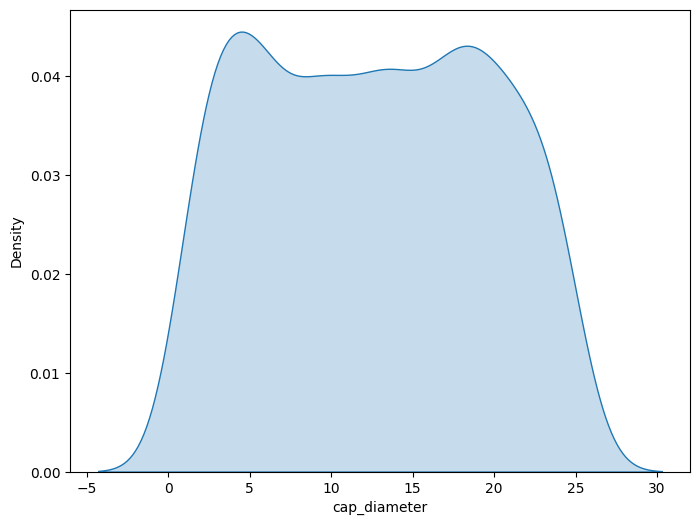

In [12]:
for column in numerical:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data[column], shade=True)
    plt.show()

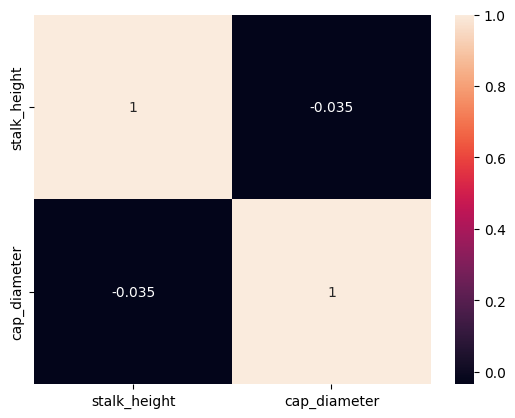

In [13]:
numerical_cols = data.select_dtypes(include=['int64','float'])
sns.heatmap(numerical_cols.corr(), annot=True)
plt.show()

In [14]:
categorical = data.select_dtypes(include=['object']).columns
categorical

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class'],
      dtype='object')

In [15]:
for col in categorical:
    label = LabelEncoder()
    data[col] = label.fit_transform(data[col])
data.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


In [17]:
x = data.drop('class', axis=1)
y = data['class']
X_train, X_test , y_train , y_test = train_test_split(x , y ,test_size = 0.2,random_state = 42)

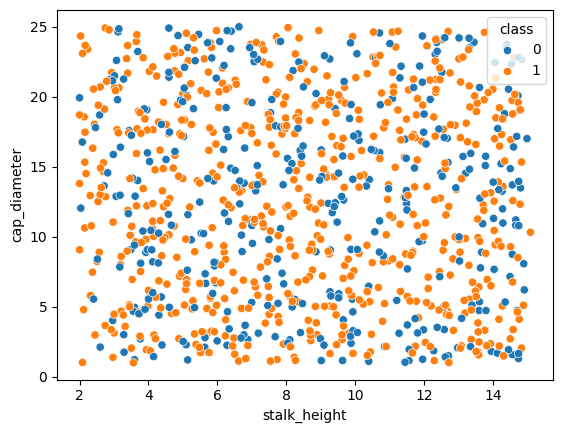

In [18]:
sns.scatterplot(x='stalk_height', y='cap_diameter', hue='class', data=data)
plt.show()

In [22]:
classCount=data['class'].value_counts()
classCount

class
1    618
0    358
Name: count, dtype: int64

In [23]:
totalCount=data['class'].value_counts().sum()
totalCount

np.int64(976)

In [24]:
classProportion=(classCount/totalCount)*100
classProportion

class
1    63.319672
0    36.680328
Name: count, dtype: float64

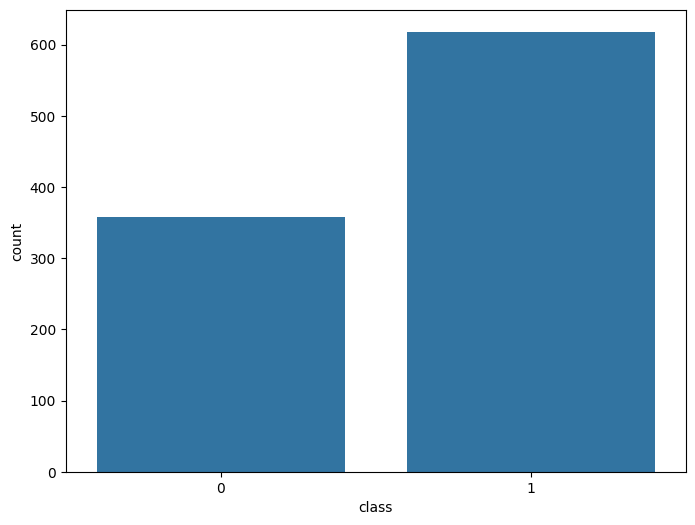

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='class')
plt.show()

In [28]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

# SVM 

In [27]:
from sklearn.svm import SVC

In [29]:
clf = SVC(kernel='rbf', random_state=42)

# Train the SVM model on the resampled training data
clf.fit(X_resampled, y_resampled)

SVC(random_state=42)

In [30]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [31]:
accuracy_score(y_test,y_pred)

0.5306122448979592

In [32]:
precision_score(y_test,y_pred)

np.float64(0.6454545454545455)

In [33]:
recall_score(y_test,y_pred)

np.float64(0.5725806451612904)

In [34]:
f1_score(y_test,y_pred)

np.float64(0.6068376068376068)

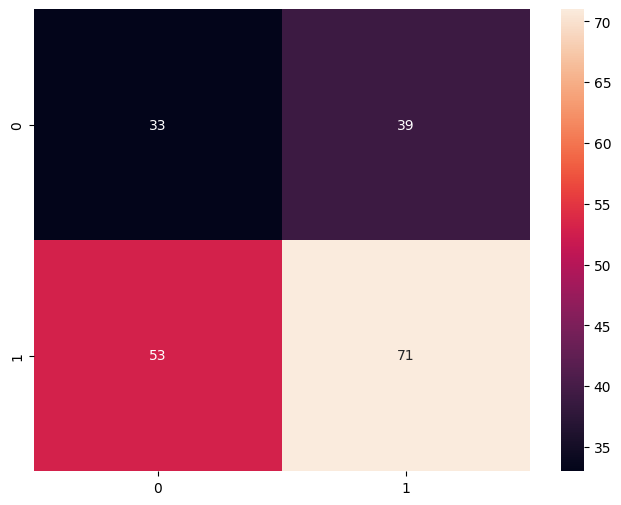

In [35]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True)
plt.show()

In [36]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.38      0.46      0.42        72\n           1       0.65      0.57      0.61       124\n\n    accuracy                           0.53       196\n   macro avg       0.51      0.52      0.51       196\nweighted avg       0.55      0.53      0.54       196\n'

In [37]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,15,0.5,0.2,0.1],'C':[100,15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_resampled, y_resampled)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [100, 15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 15, 0.5, 0.2, 0.1],
                          'kernel': ['rbf']}])

In [38]:
gsv.best_params_ , gsv.best_score_

({'C': 100, 'gamma': 50, 'kernel': 'rbf'}, np.float64(0.8656565656565658))

In [39]:
param_grid_C = {
    'C': [0.1, 1, 10, 100]
}

svm = SVC(kernel='rbf', gamma='scale', random_state=42)
grid_search_C = GridSearchCV(svm, param_grid_C, cv=5, scoring='accuracy')
grid_search_C.fit(X_resampled, y_resampled)
best_C = grid_search_C.best_params_['C']
best_score_C = grid_search_C.best_score_

In [40]:
best_C

100

In [41]:
best_score_C

np.float64(0.7086602061221351)

In [42]:
param_grid_gamma = {
    'gamma': [0.01, 0.1, 1, 'scale', 'auto'] 
}

svm = SVC(kernel='rbf', C=best_C, random_state=42)
grid_search_gamma = GridSearchCV(svm, param_grid_gamma, cv=5, scoring='accuracy')
grid_search_gamma.fit(X_resampled, y_resampled)
best_gamma = grid_search_gamma.best_params_['gamma']
best_score_gamma = grid_search_gamma.best_score_

In [43]:
best_gamma

0.1

In [44]:
best_score_gamma

np.float64(0.8616161616161616)

In [45]:
param_grid_kernel = {
    'kernel': ['linear', 'poly', 'rbf']  
}

svm = SVC(C=best_C, gamma=best_gamma, random_state=42)
grid_search_kernel = GridSearchCV(svm, param_grid_kernel, cv=5, scoring='accuracy')
grid_search_kernel.fit(X_resampled, y_resampled)
best_kernel = grid_search_kernel.best_params_['kernel']
best_score_kernel = grid_search_kernel.best_score_

In [46]:
best_kernel

'rbf'

In [47]:
best_score_kernel

np.float64(0.8616161616161616)

In [48]:
svm_classifier = SVC(kernel='rbf', C=100, gamma=0.1, random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred)

0.6326530612244898

In [50]:
precision_score(y_test, y_pred)

np.float64(0.6326530612244898)

In [51]:
recall_score(y_test, y_pred)

np.float64(1.0)

In [52]:
f1_score(y_test, y_pred)

np.float64(0.775)

In [53]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_poly = SVC(kernel='poly', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred_linear)

0.6326530612244898

In [55]:
precision_score(y_test, y_pred_linear)

np.float64(0.6326530612244898)

In [56]:
recall_score(y_test, y_pred_linear)

np.float64(1.0)

In [57]:
f1_score(y_test, y_pred_linear)

np.float64(0.775)

In [58]:
accuracy_score(y_test, y_pred_poly)

0.6071428571428571

In [59]:
precision_score(y_test, y_pred_poly)

np.float64(0.6243386243386243)

In [60]:
recall_score(y_test, y_pred_poly)

np.float64(0.9516129032258065)

In [61]:
f1_score(y_test, y_pred_poly)

np.float64(0.7539936102236422)

In [62]:
accuracy_score(y_test, y_pred_rbf)

0.6326530612244898

In [63]:
precision_score(y_test, y_pred_rbf)

np.float64(0.6326530612244898)

In [64]:
recall_score(y_test, y_pred_rbf)

np.float64(1.0)

In [65]:
f1_score(y_test, y_pred_rbf)

np.float64(0.775)

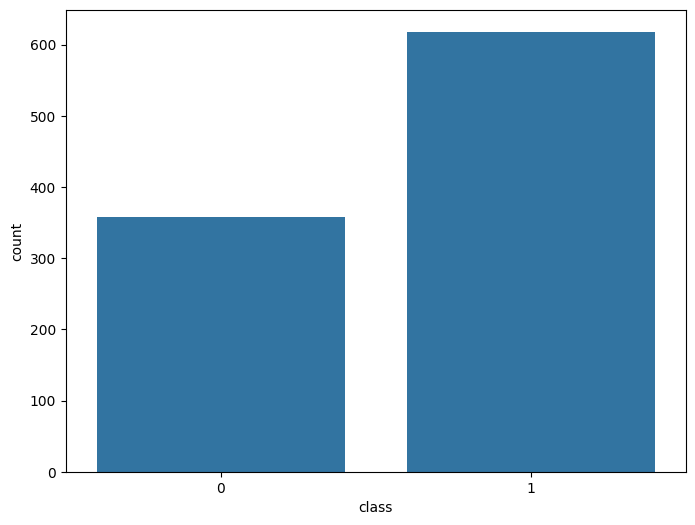

In [66]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='class')
plt.show()

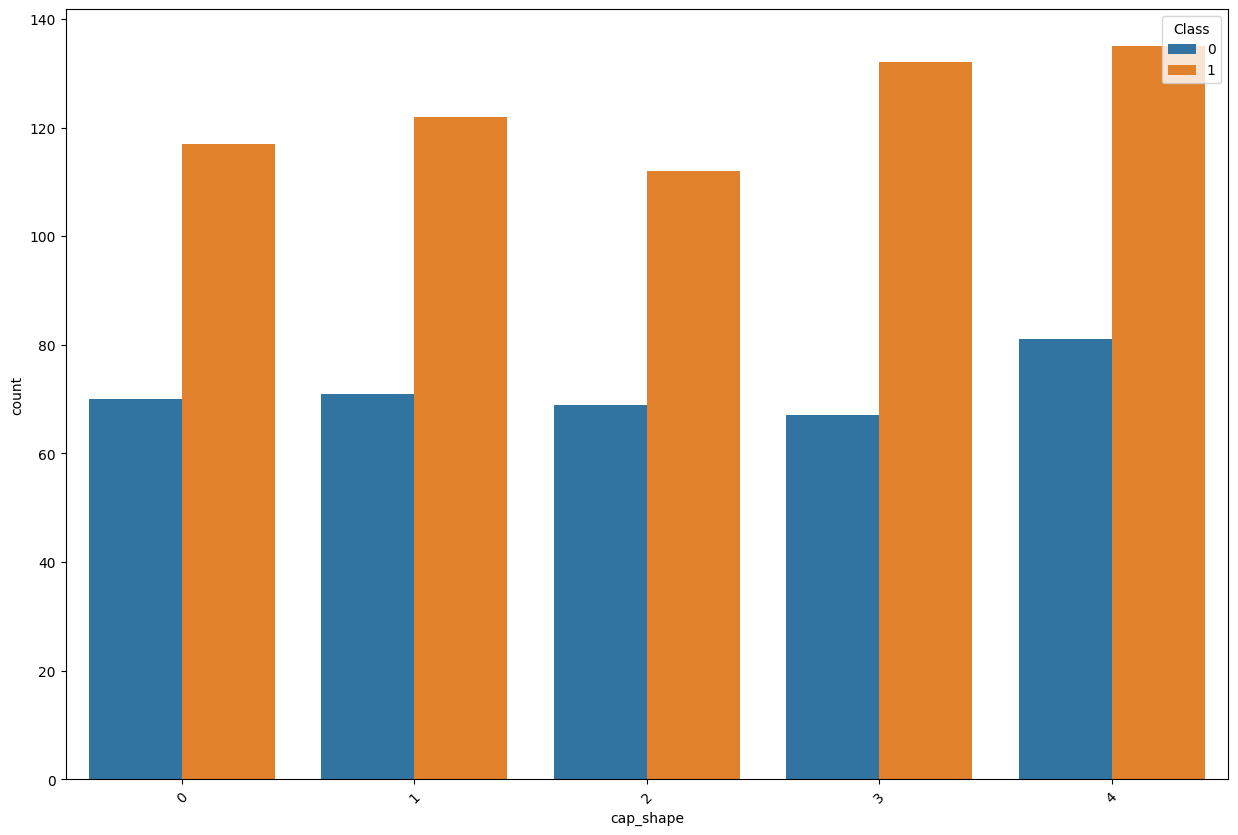

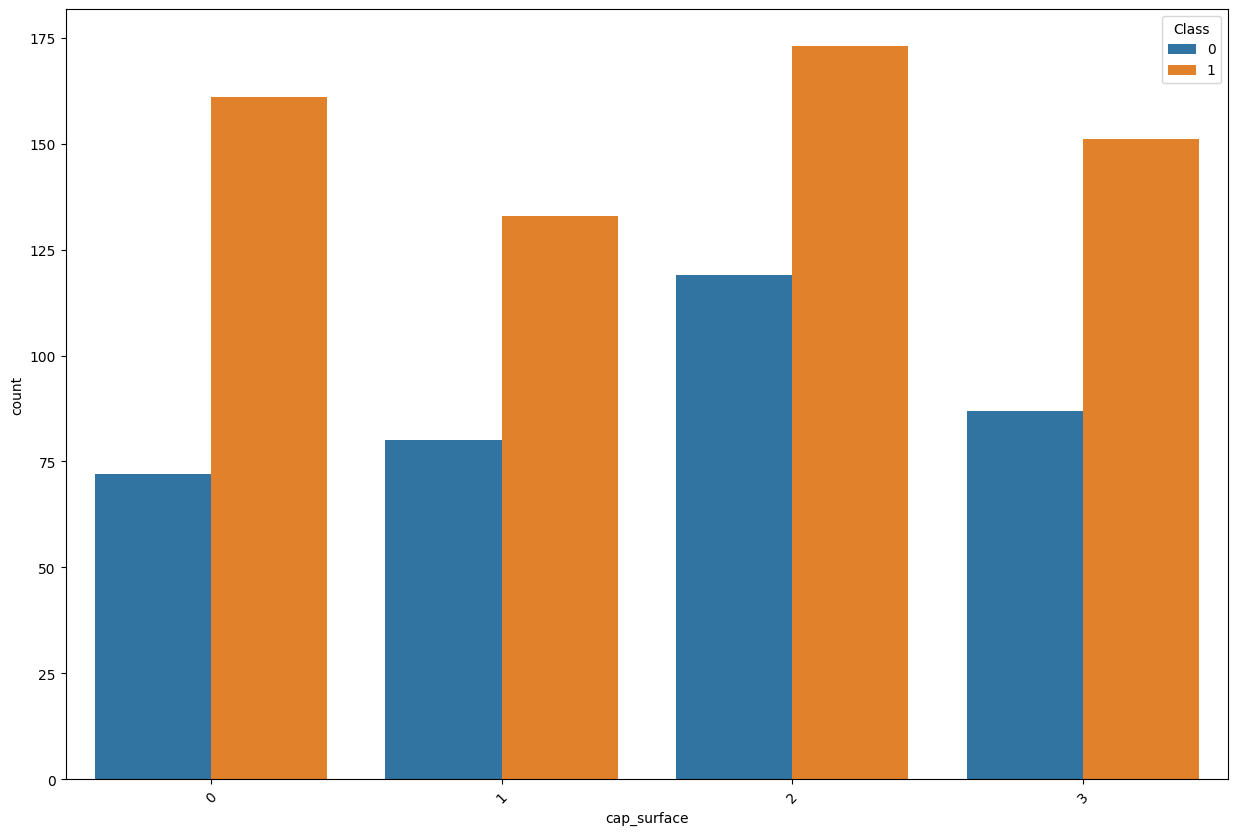

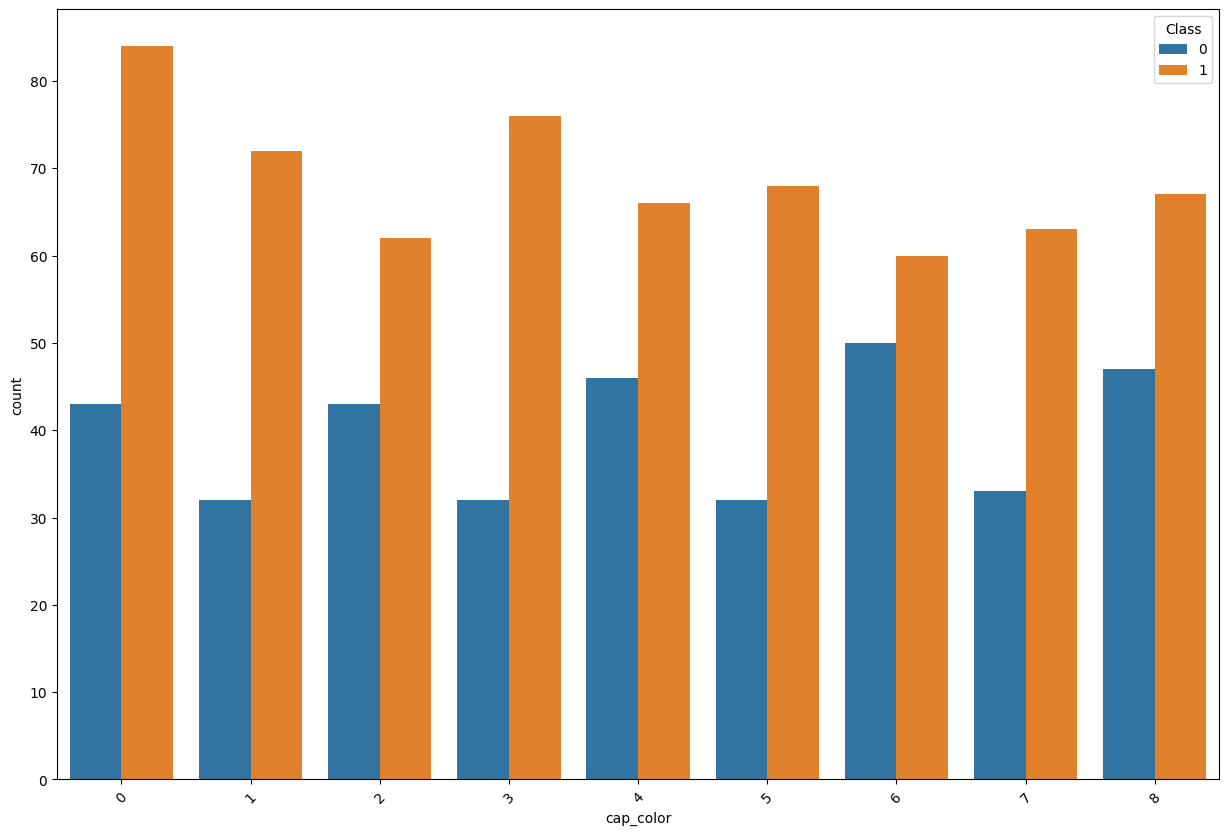

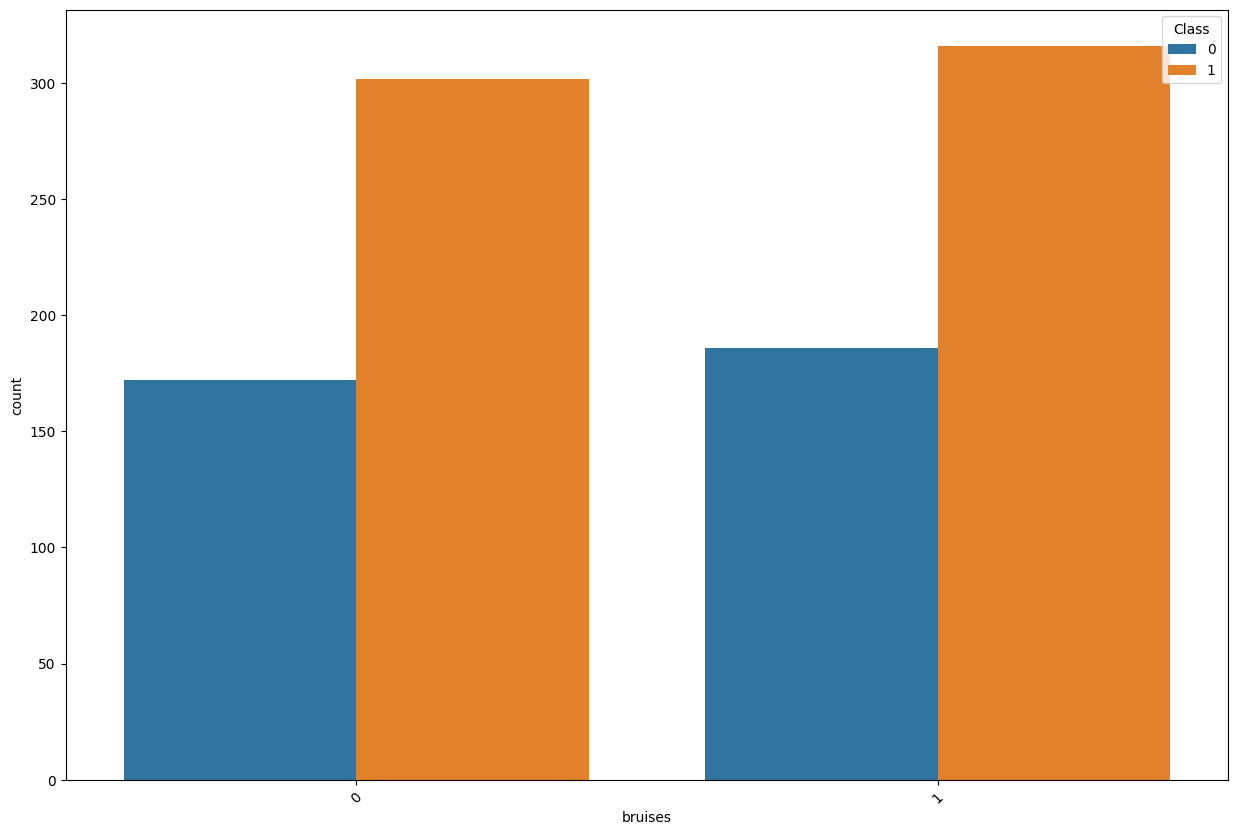

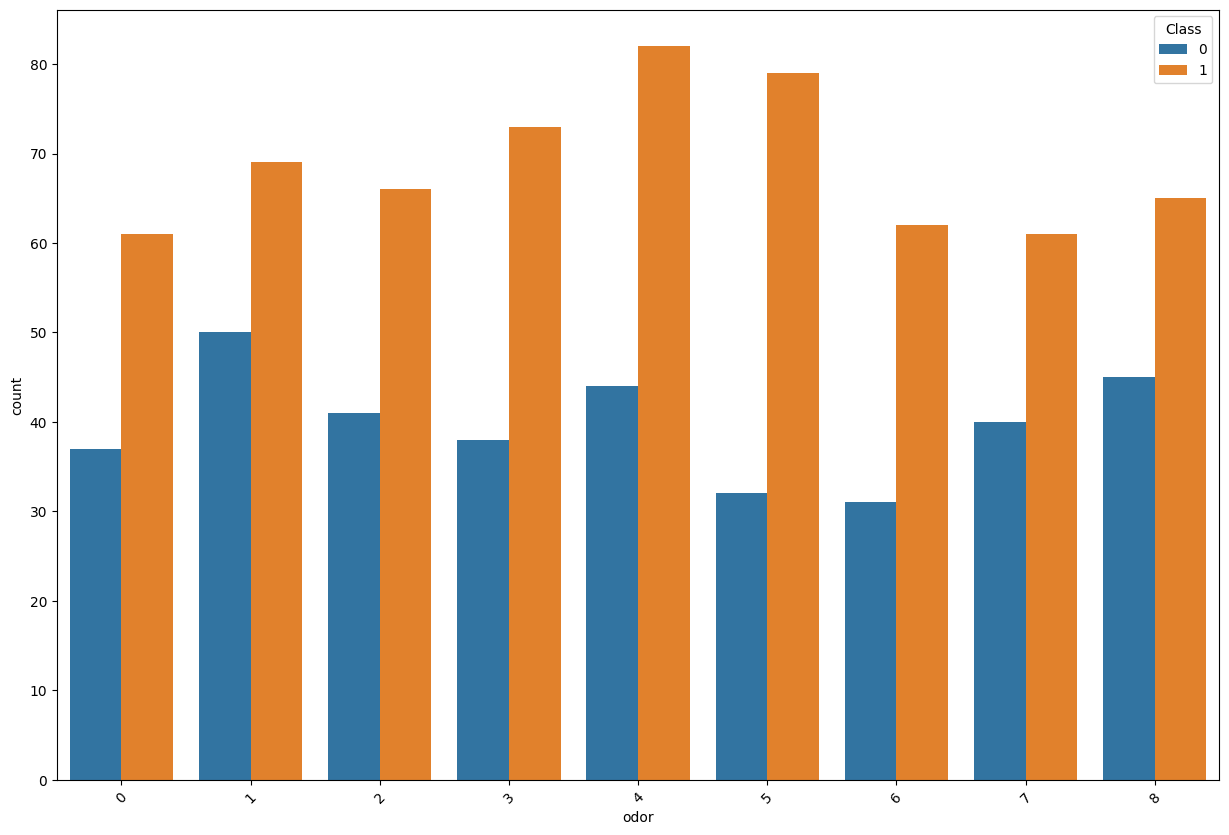

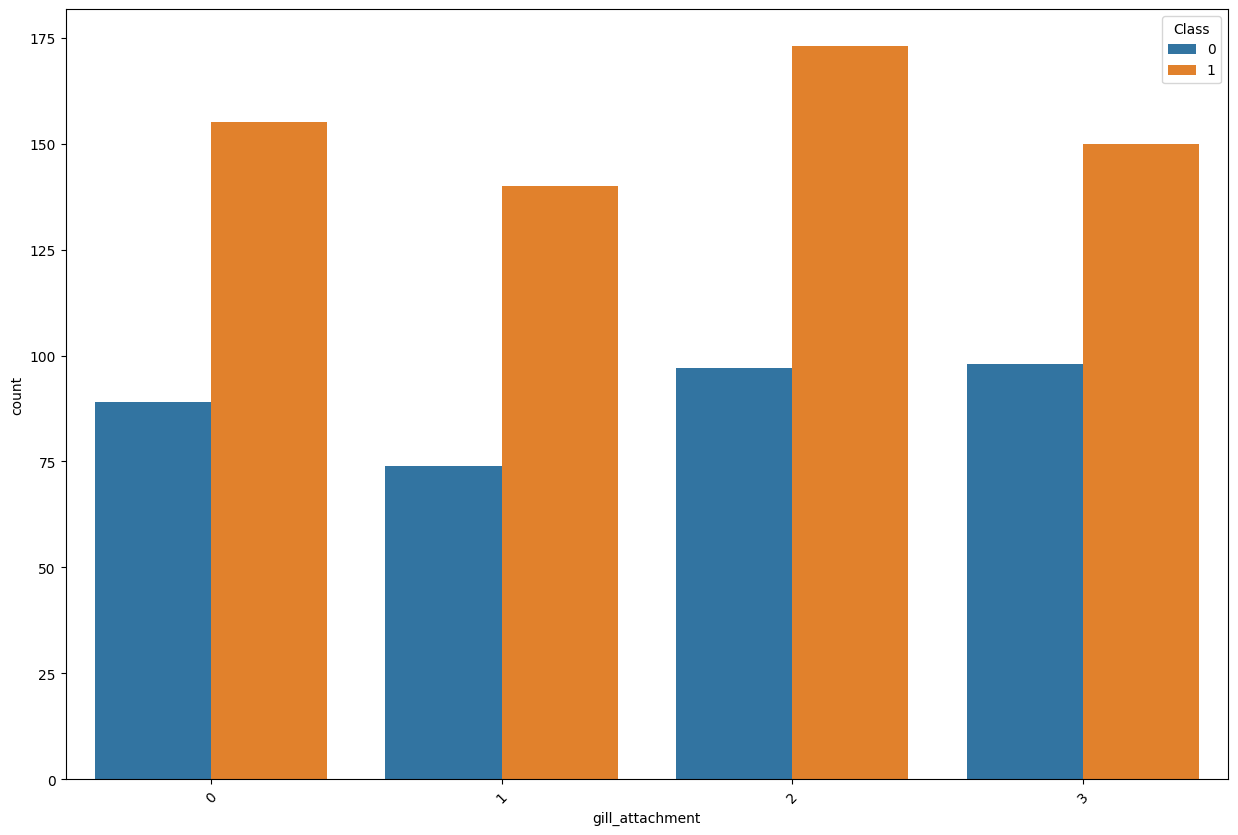

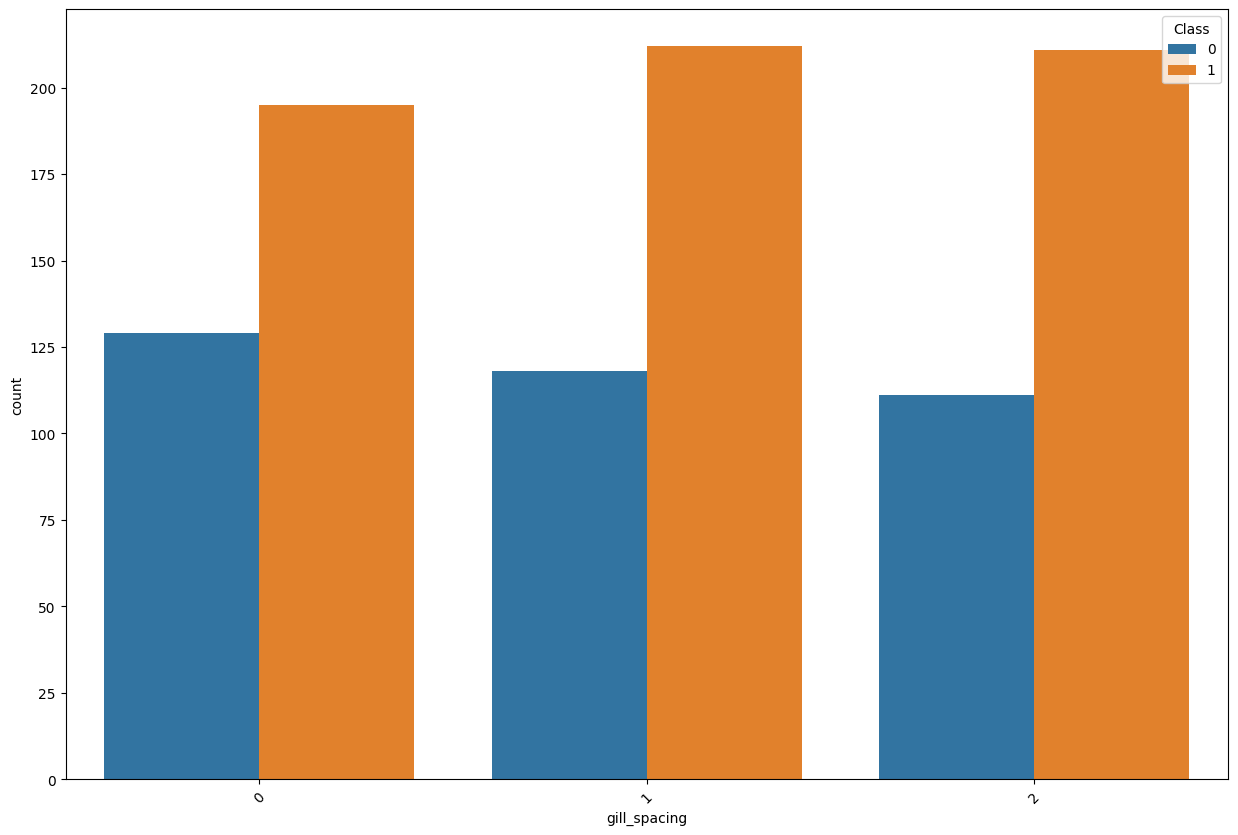

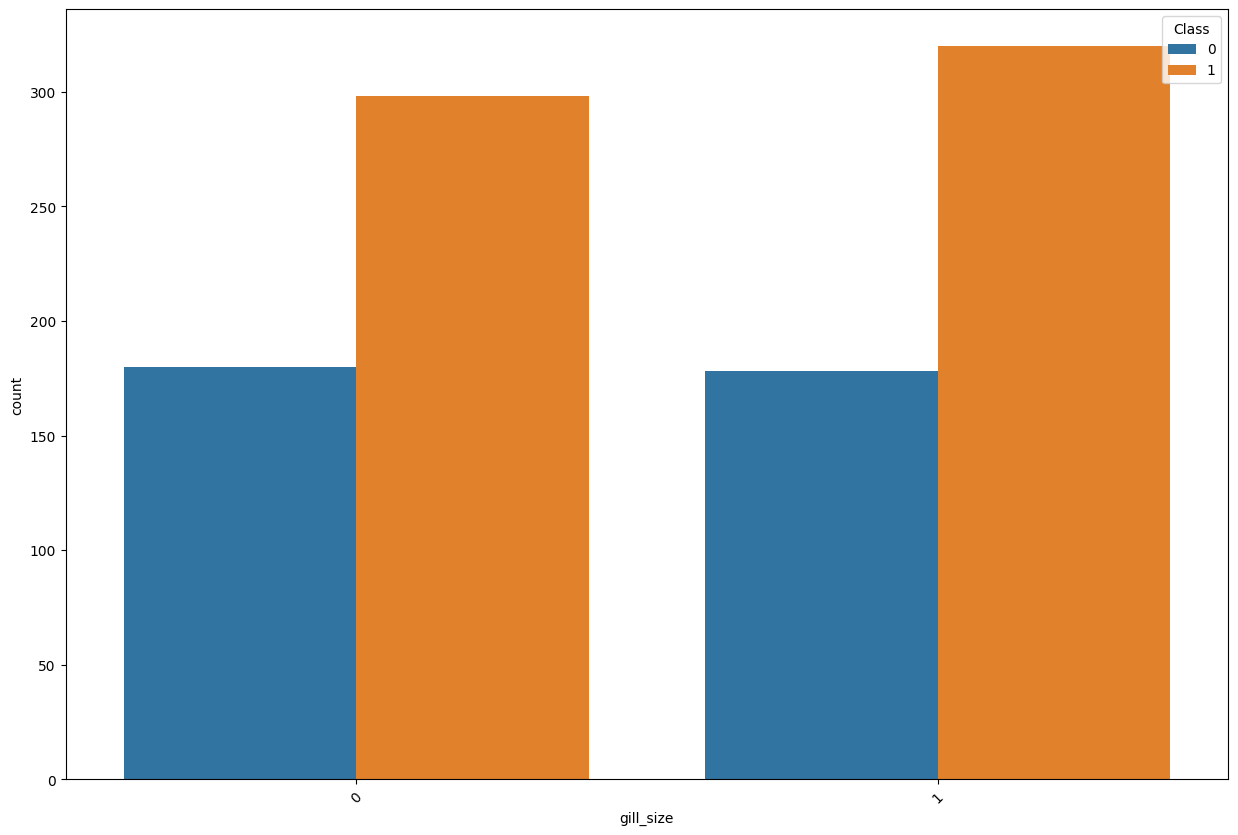

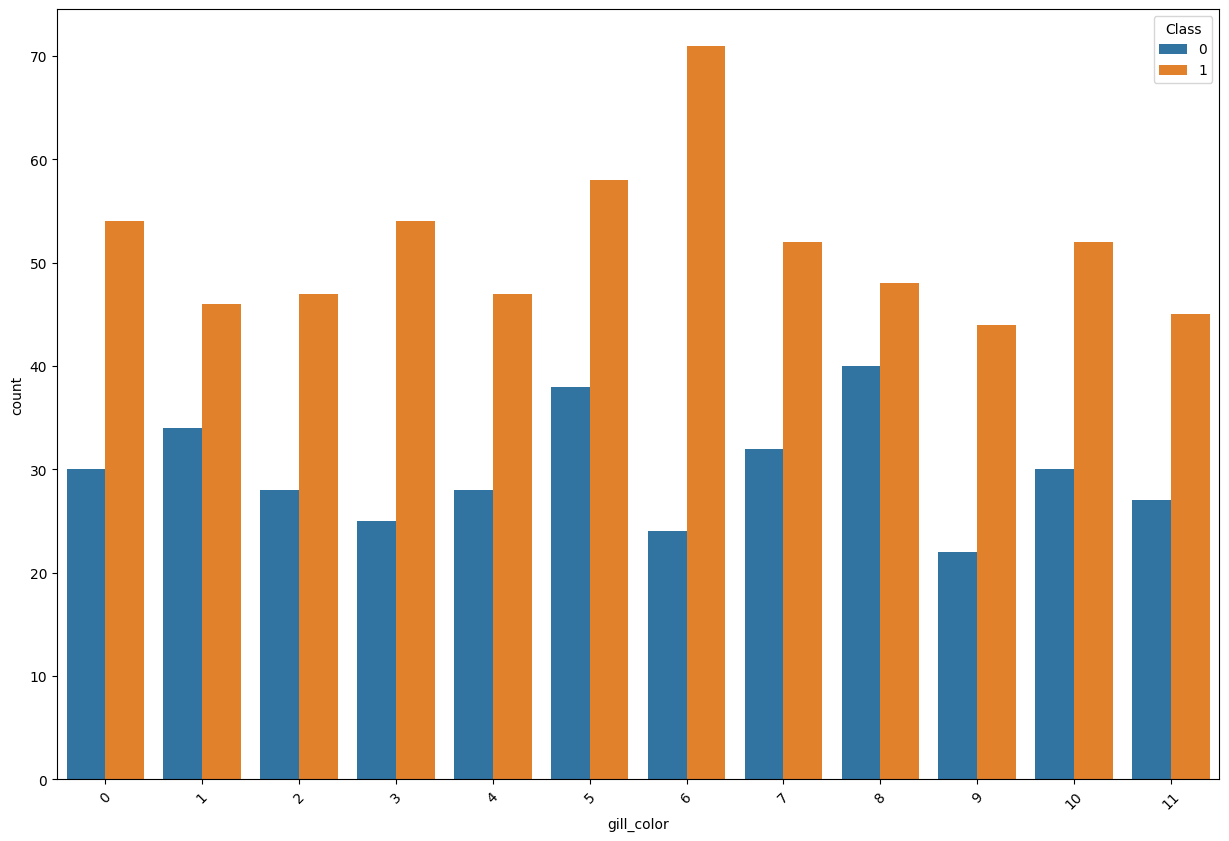

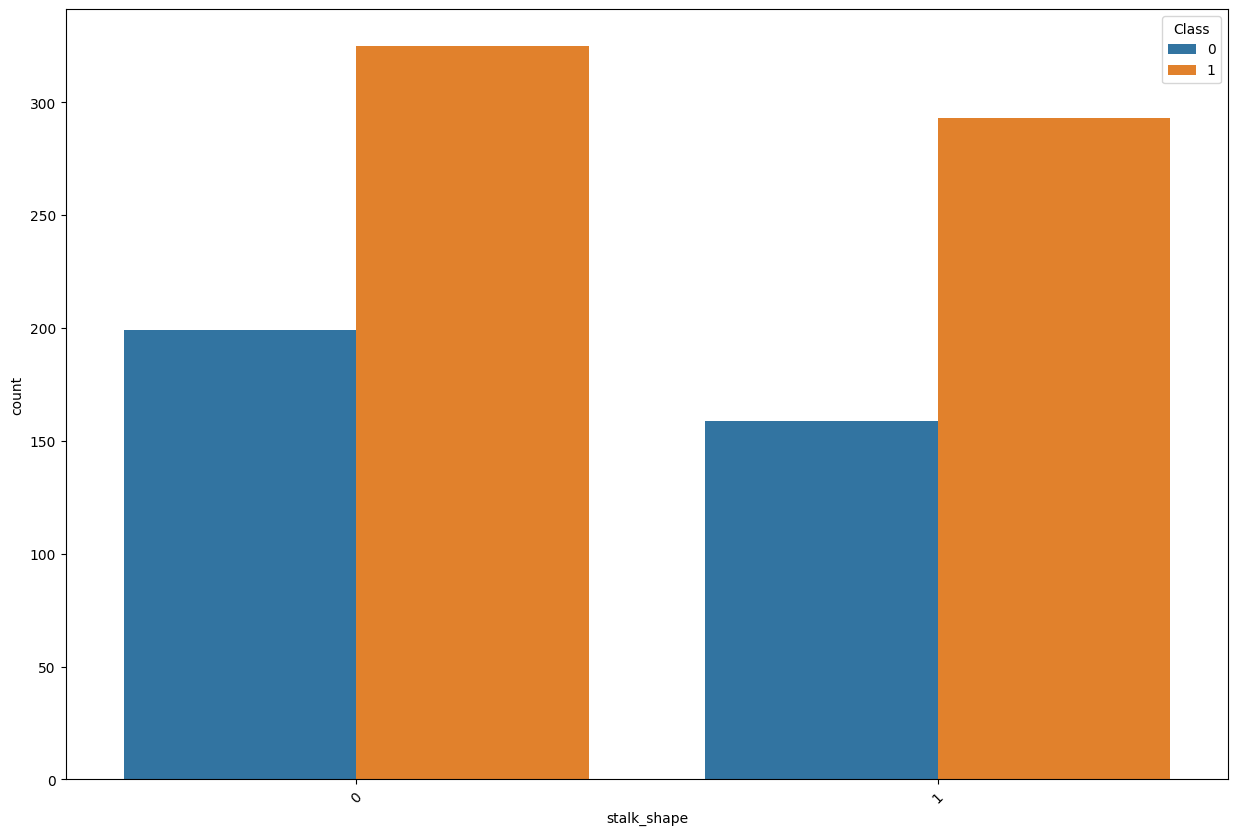

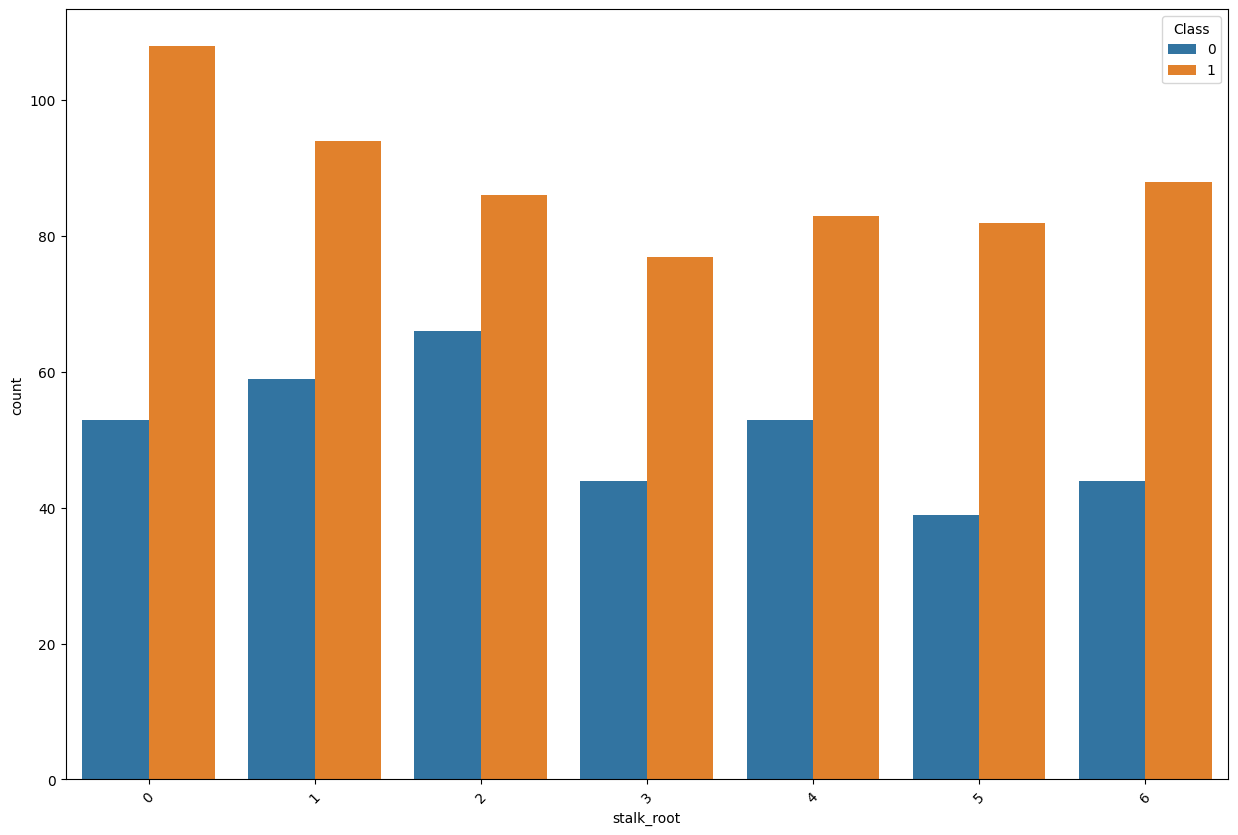

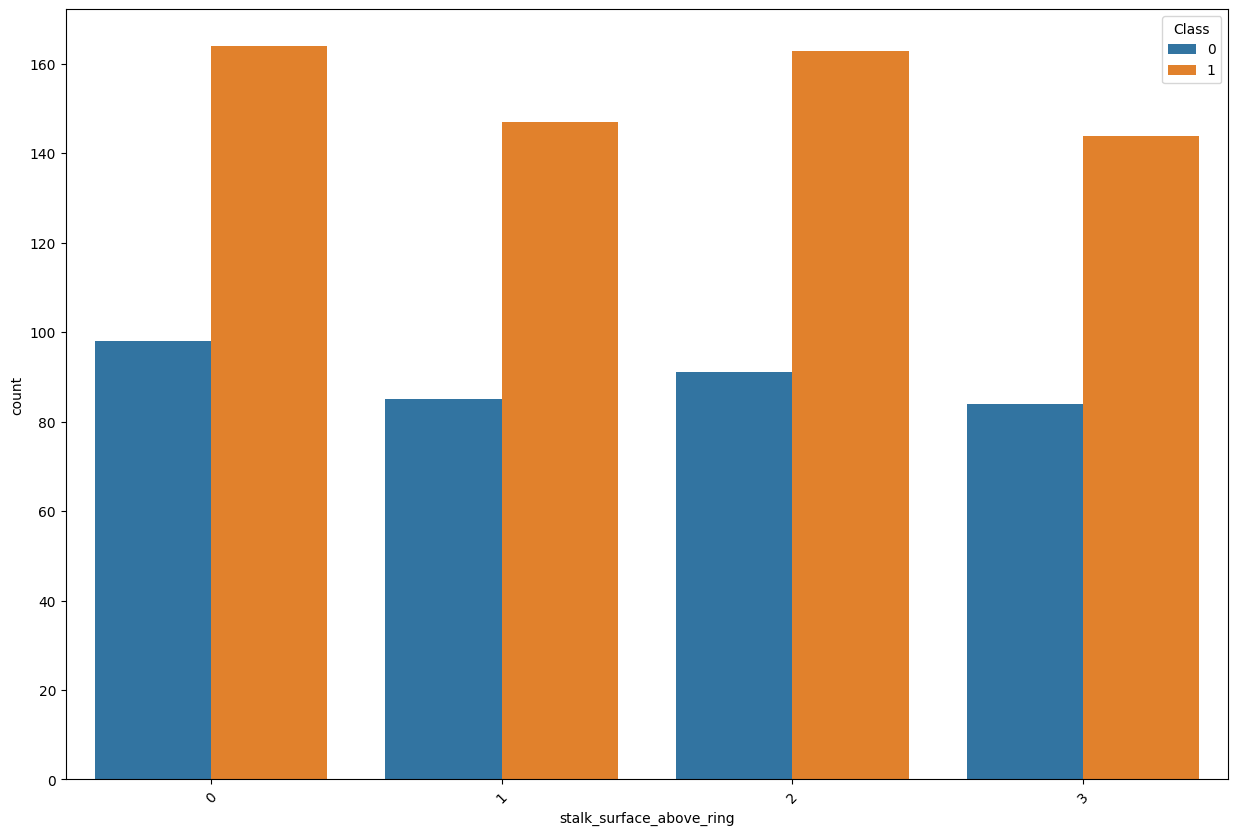

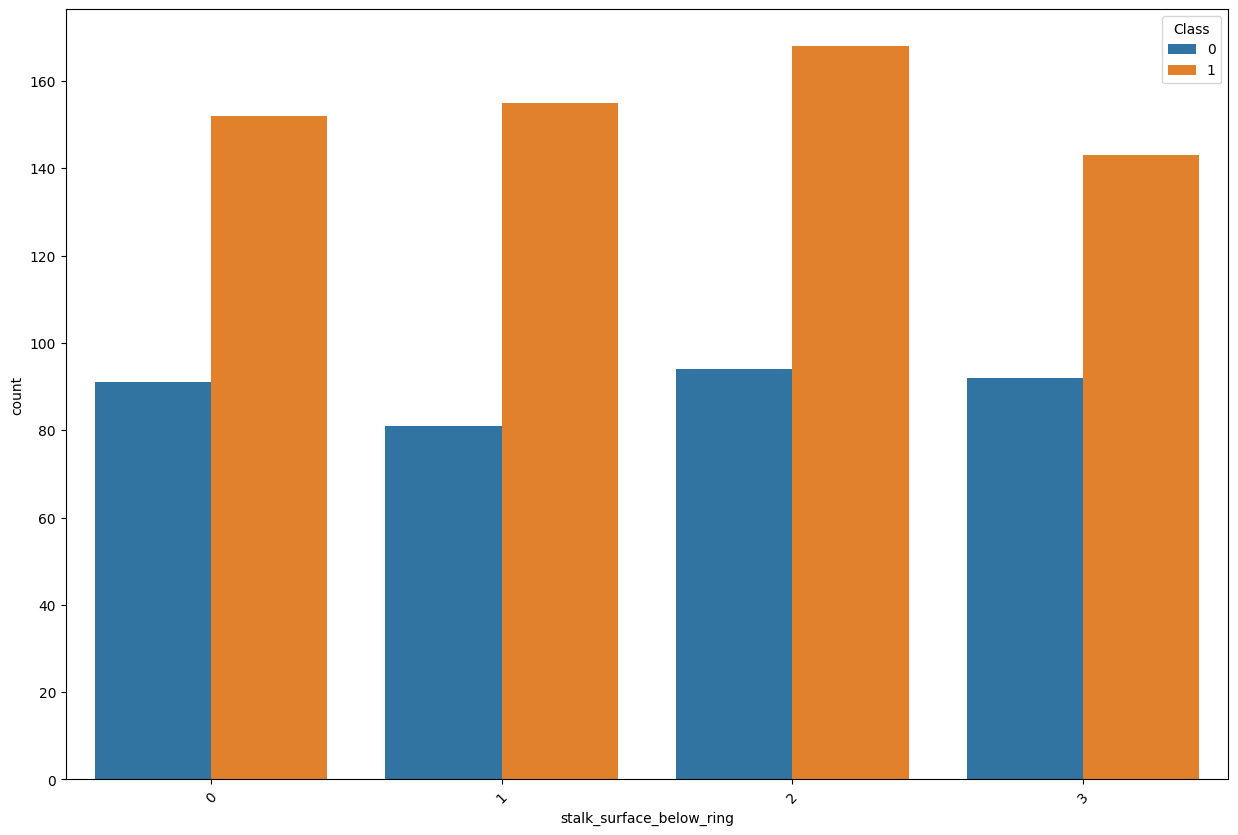

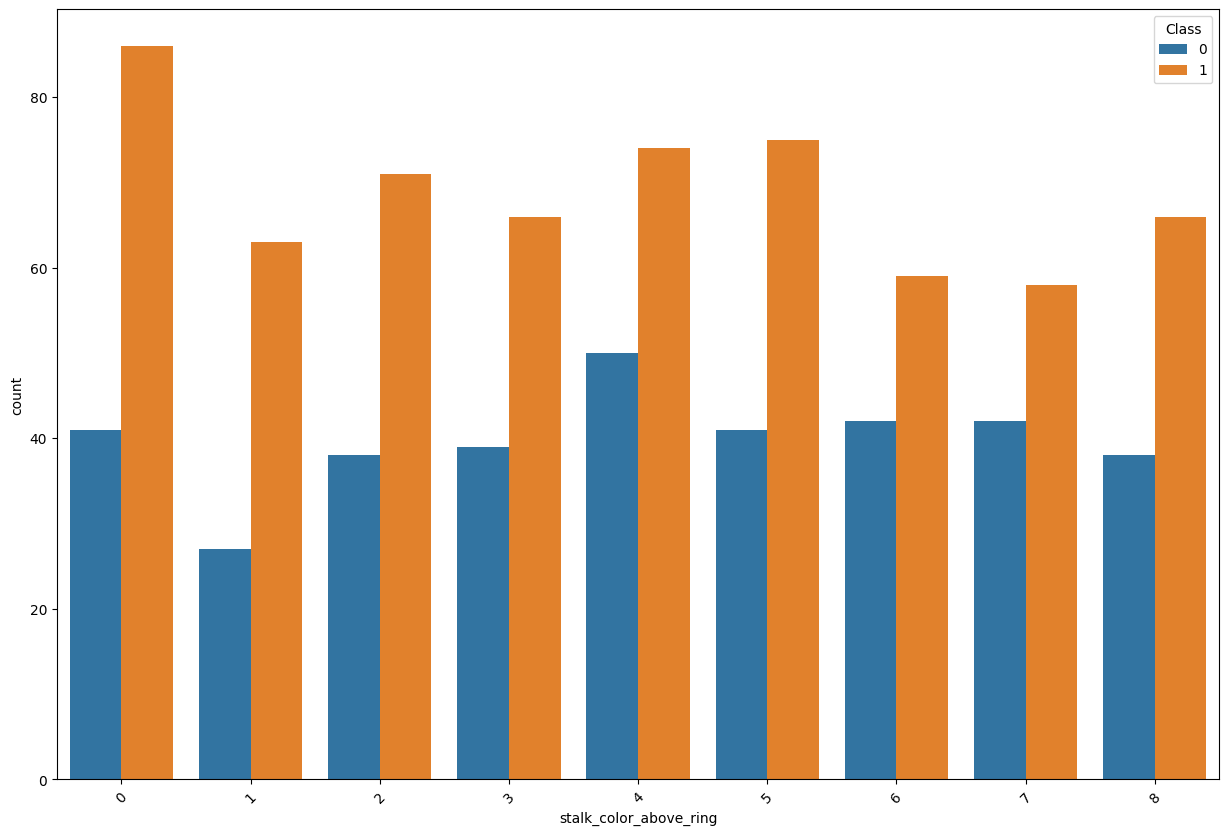

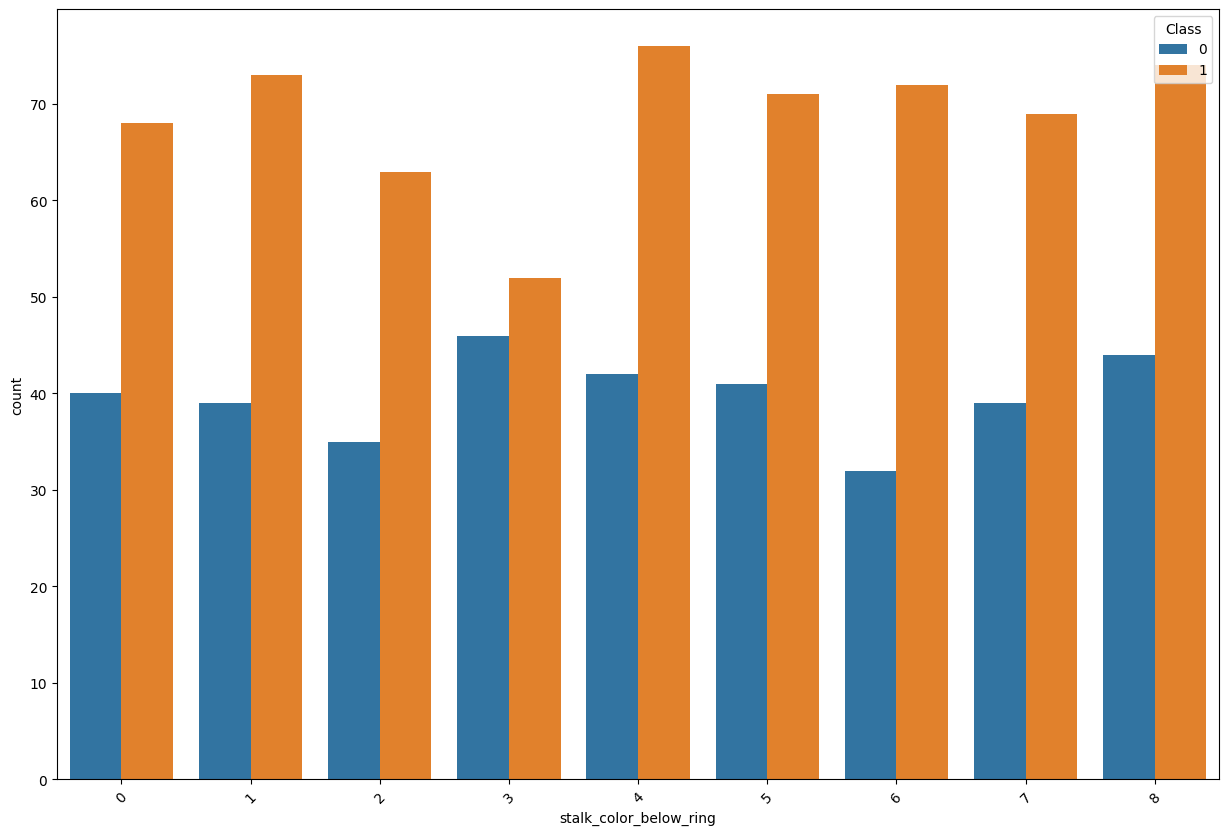

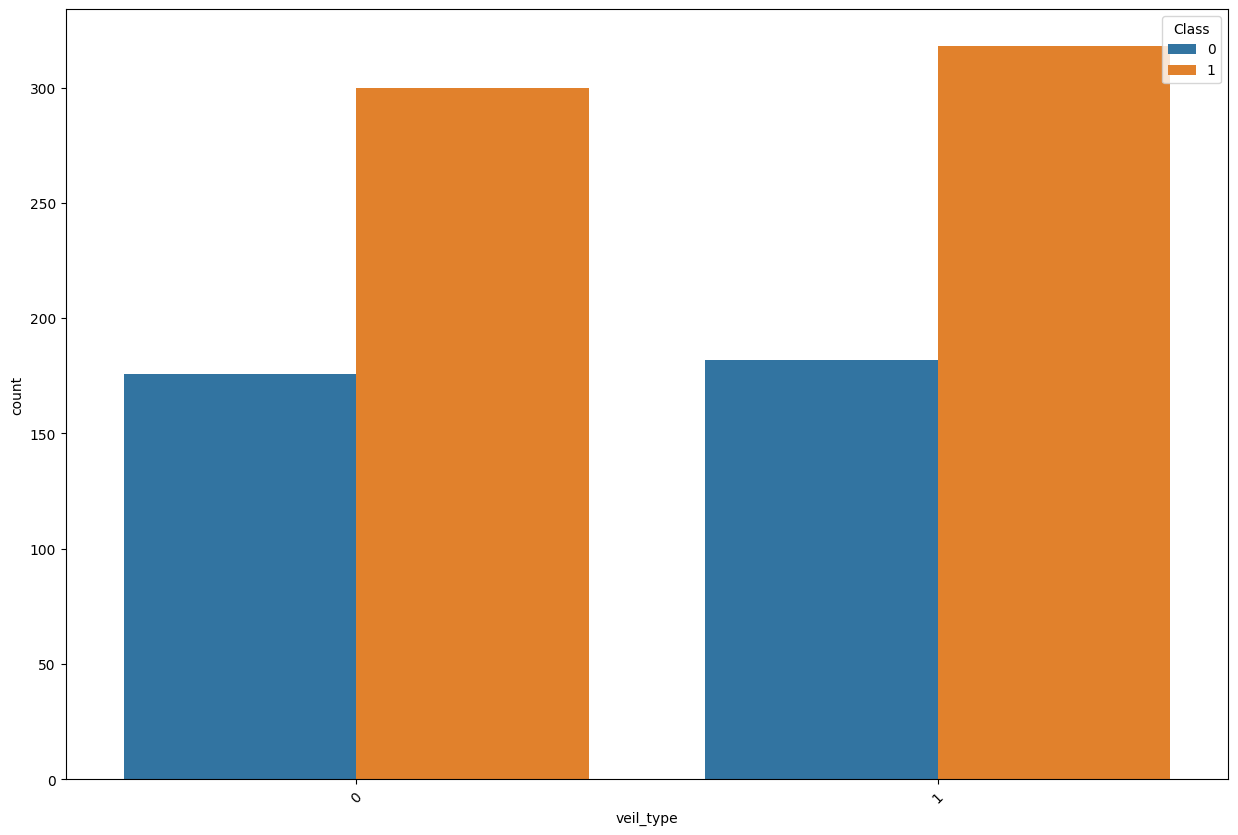

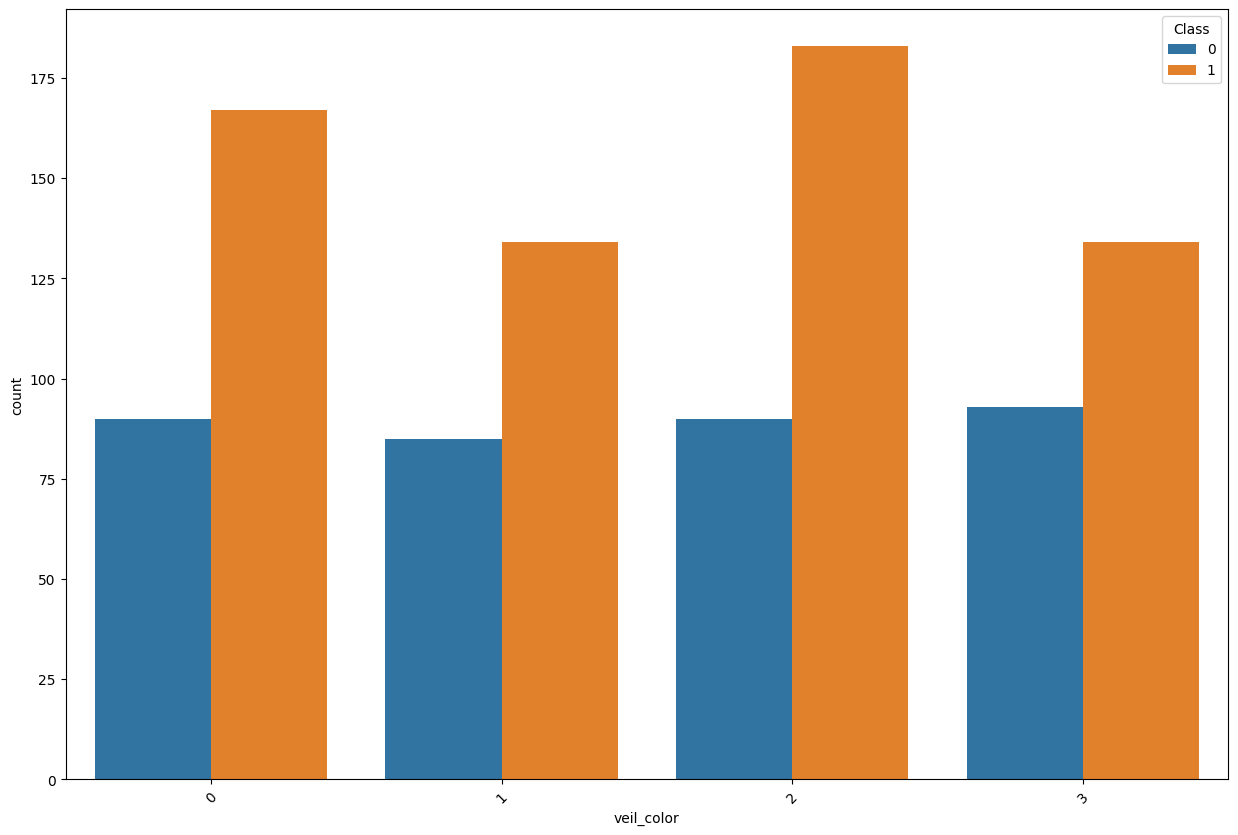

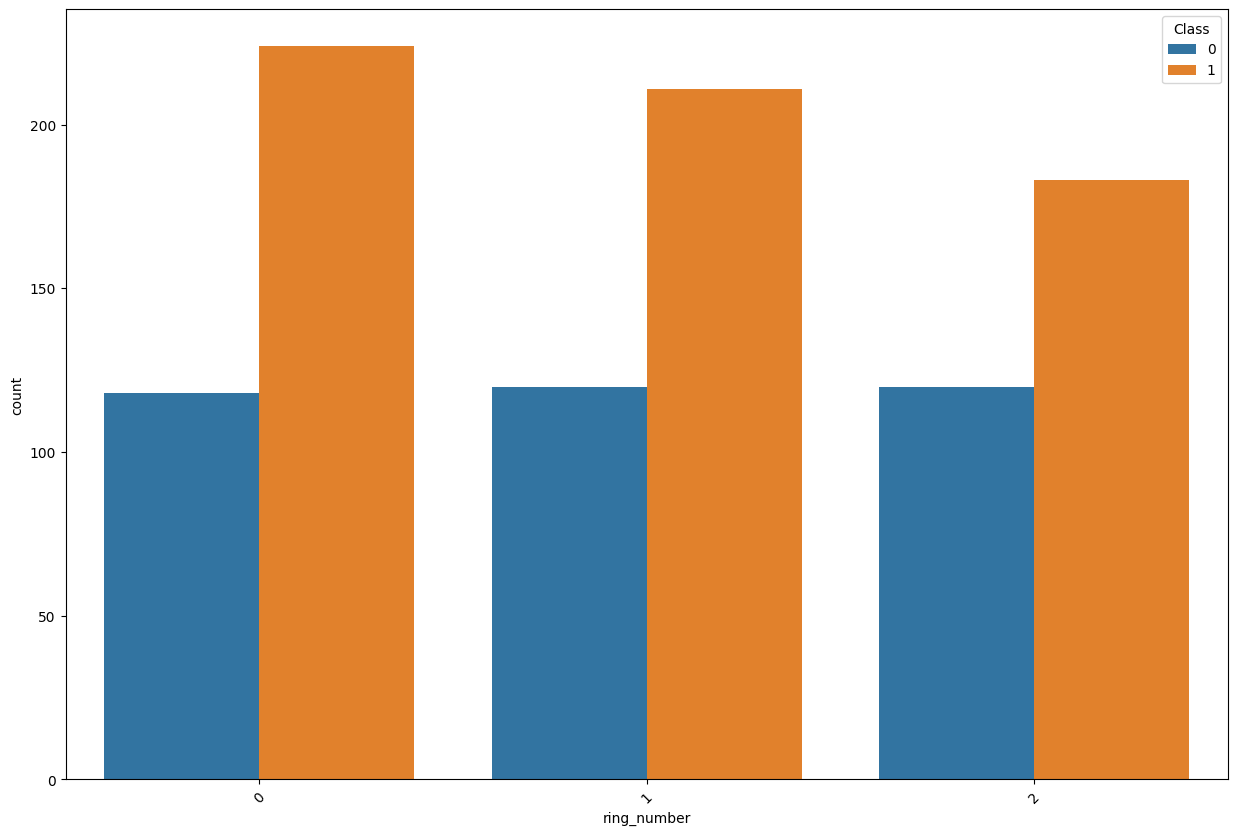

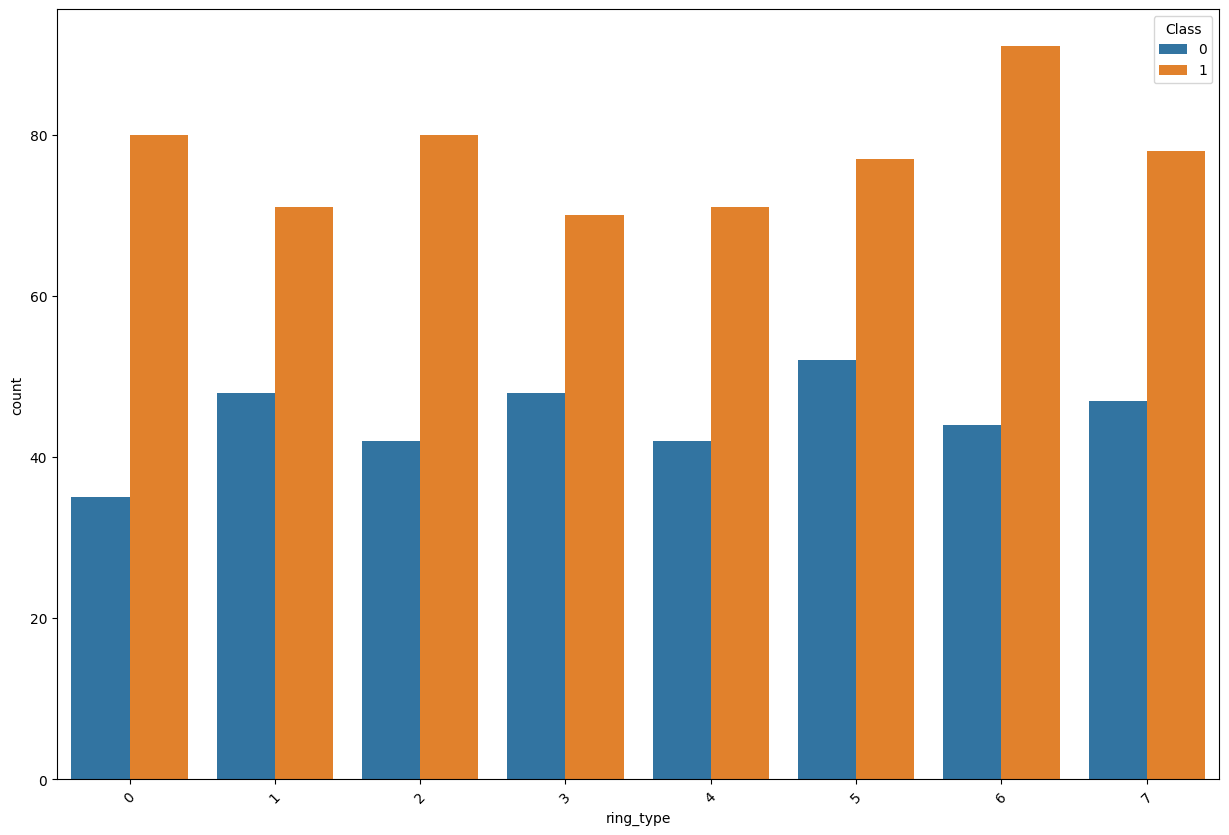

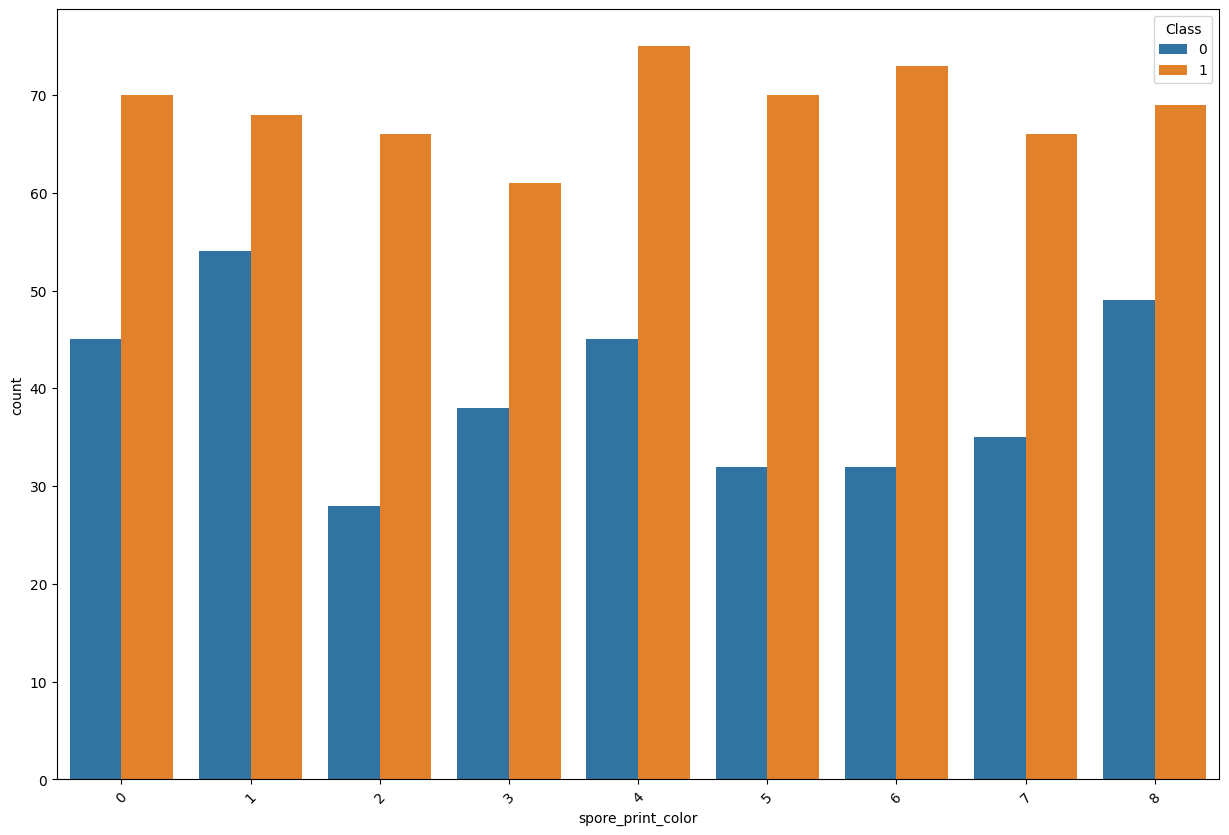

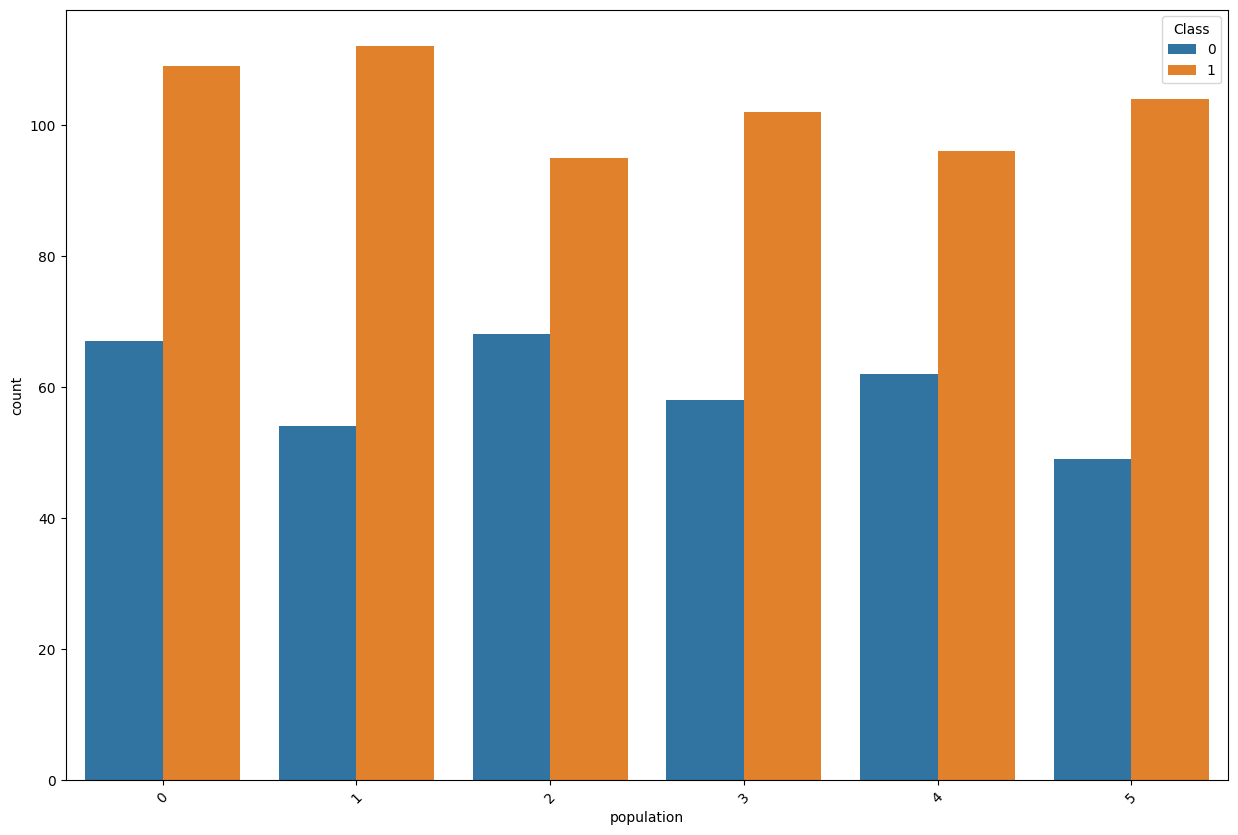

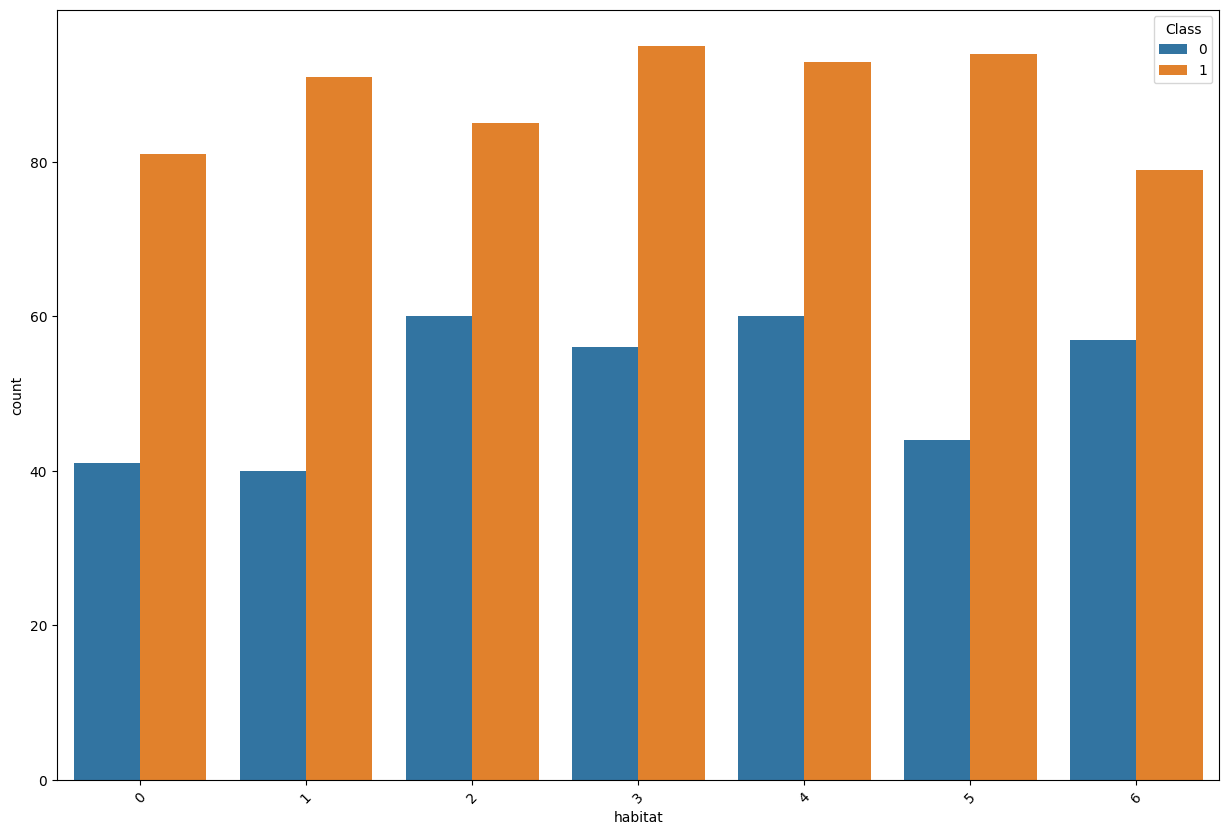

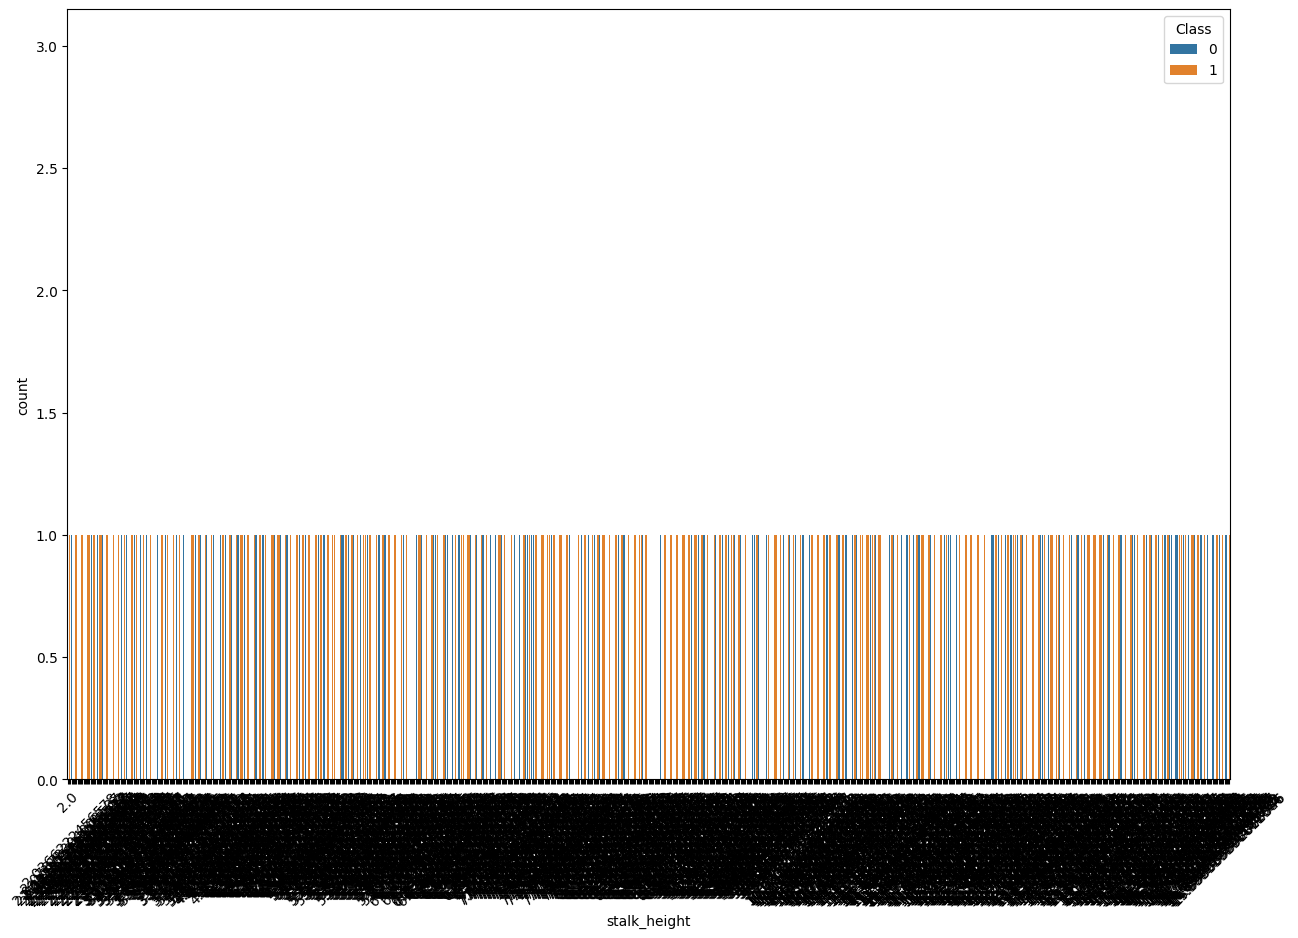

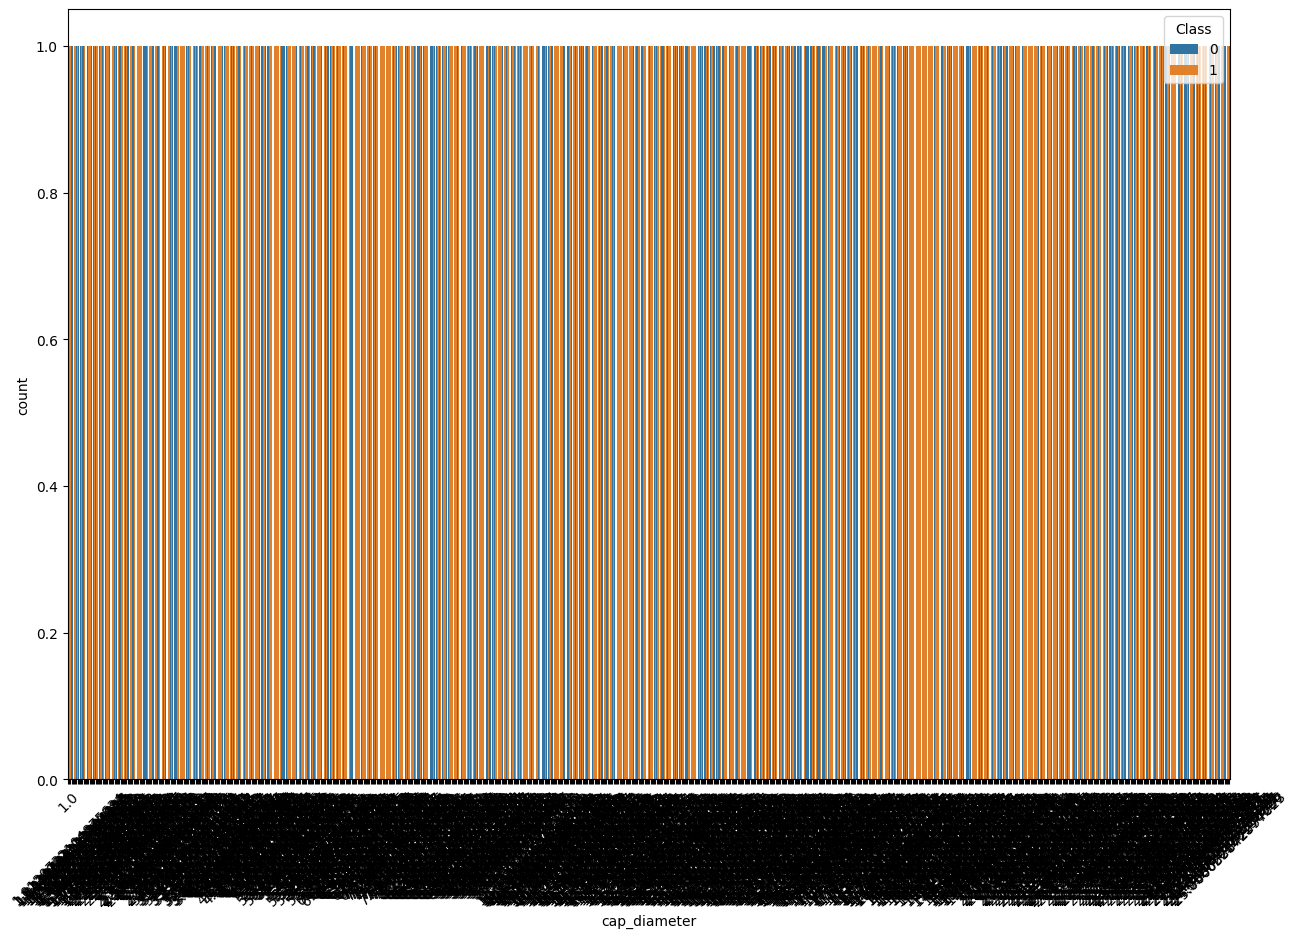

In [67]:
features = data.drop(columns=['class'])  
for feature in features.columns:
    plt.figure(figsize=(15,10))
    sns.countplot(data=data, x=feature, hue='class')
    plt.xticks(rotation=45)
    plt.legend(title='Class', loc='upper right')
    plt.show()

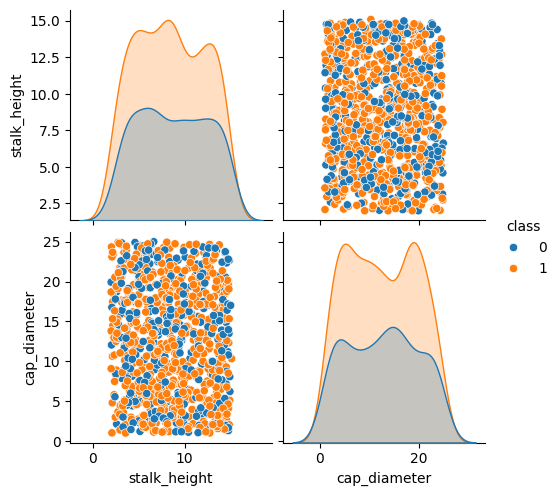

In [68]:
numerical_features = ['stalk_height', 'cap_diameter']
sns.pairplot(data[numerical_features + ['class']], hue='class')
plt.show()